In [6]:
import os
import sys

# Move up to the correct project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

print("Updated Python path:", sys.path)  # Debugging check

Updated Python path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env', '', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\D

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from Strategien.bollinger_strategy import run_bollinger_strategy
from Strategien.momentum import run_momentum_strategy
from Strategien.Moving_Average import run_moving_average_strategy
from Strategien.Buy_and_Hold import run_buy_and_hold_strategy


from RL_Backtest_Agents.DQN_Backtest import run_dqn_backtest, compute_backtest_metrics
#from RL_Backtest_Agents.PPO_Backtest import run_ppo_backtest
#from RL_Backtest_Agents.A2C_Backtest import run_a2c_backtest

Strategien ausführen

Seed in the environment: 42
Seed in the environment: 42


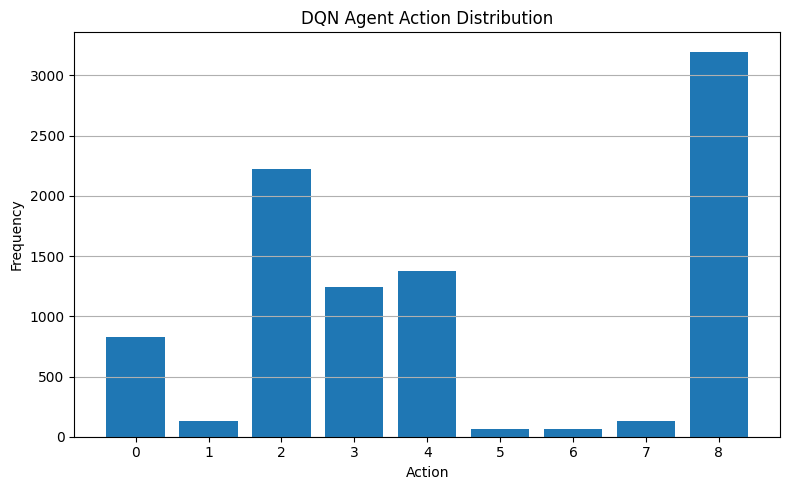

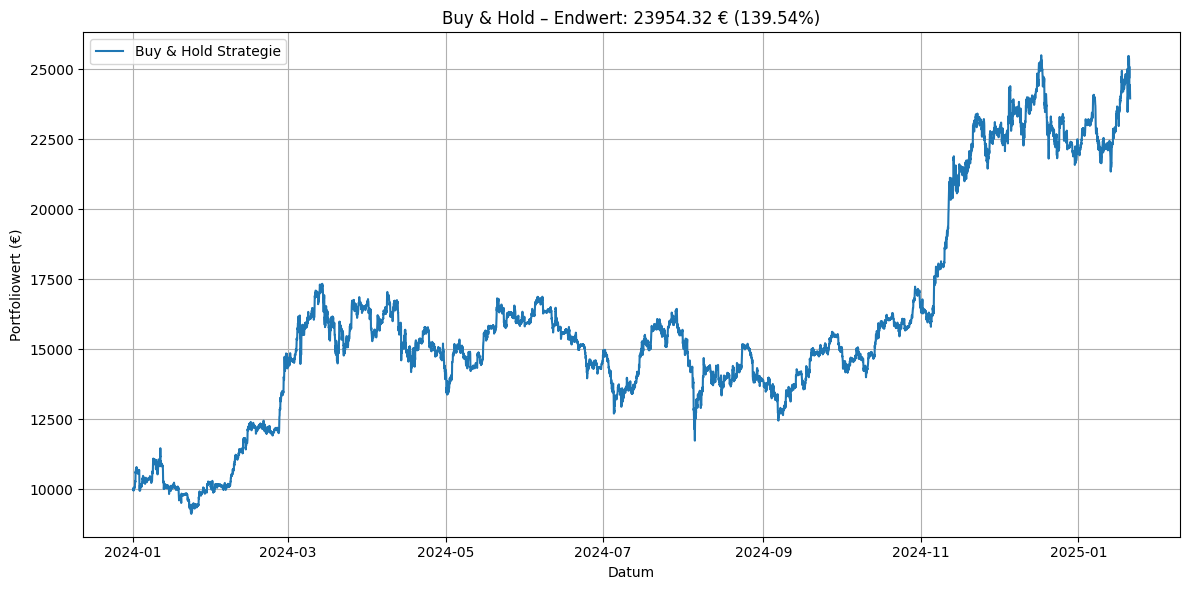

In [8]:
# Strategien ausführen
ma_result = run_moving_average_strategy()
bollinger_result = run_bollinger_strategy()
momentum_result = run_momentum_strategy()
dqn_result = run_dqn_backtest()
bh_result = run_buy_and_hold_strategy()

#a2c_result = run_a2c_backtest()
#ppo_result = run_ppo_backtest()

# Portfolios extrahieren
strategies = {
    "Moving Average": ma_result["portfolio"],
    "Bollinger Bands": bollinger_result["portfolio"],
    "Momentum": momentum_result["portfolio"],
    "Buy & Hold": bh_result["portfolio"],
    "DQN Agent": dqn_result["portfolio"],
    #"A2C Agent": a2c_result["portfolio"],
    #"PPO Agent": ppo_result["portfolio"]
}


Portfoliowerte vergleichen 

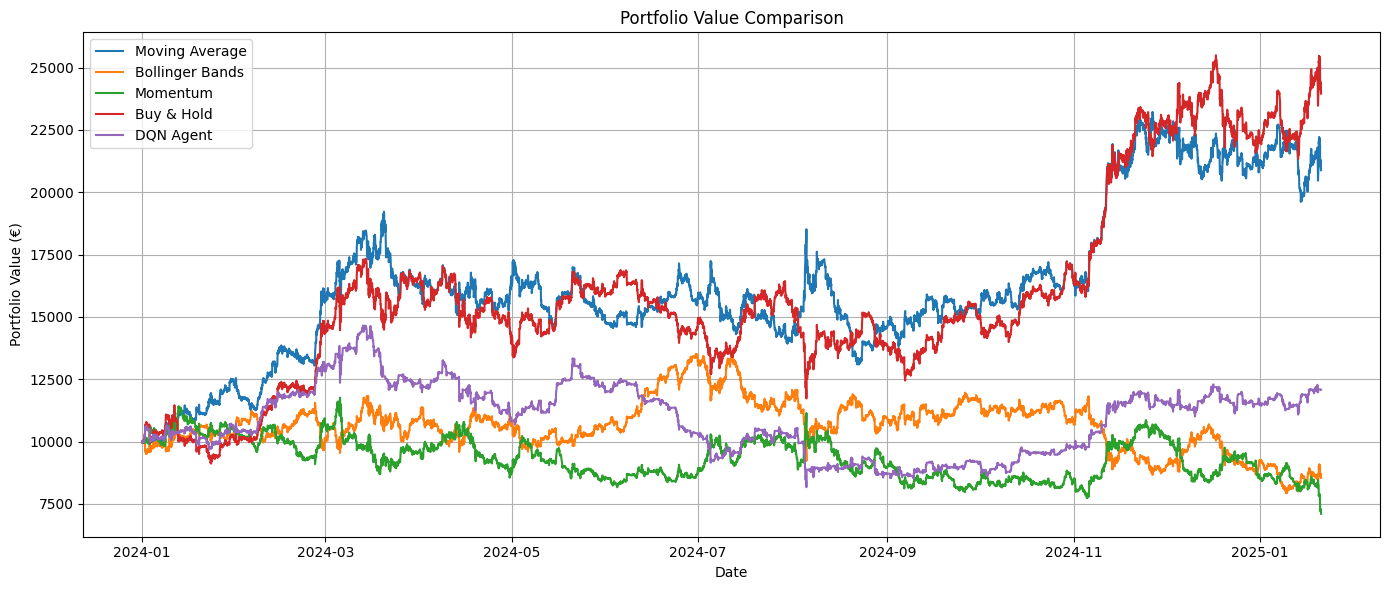

In [9]:
plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Metriken Vergleichen

In [10]:
results = {}
for name, values in strategies.items():
    metrics = compute_backtest_metrics(values)
    results[name] = metrics

pd.DataFrame(results).T.round(4)


,final_portfolio_value,profit,annualized_return,sharpe_ratio,max_drawdown,win_rate,loss_rate
Moving Average,20885.6785,10885.6785,1.0064,1.5876,-0.3189,0.4909,0.4970
Bollinger Bands,8542.7465,-1415.8913,-0.1350,-0.0090,-0.4132,0.5123,0.4838
Momentum,7103.7250,-2849.4880,-0.2730,-0.3388,-0.3959,0.4727,0.5229
Buy & Hold,23954.3207,13954.3207,1.2840,1.8248,-0.3233,0.5123,0.4860
DQN Agent,12079.7689,2079.7689,0.1956,0.6545,-0.4423,0.3195,0.3087
